In [28]:
import re
import time
import builtwith
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC

In [2]:
builtwith.parse('https://www.1177.se/Varmland/hitta-vard/?caretype=&cs=true&location=&q=&s=name&st=11731f10-90c8-4ed3-8776-43d9d0ed4a8f')

{'web-frameworks': ['ZURB Foundation']}

In [5]:
def init_driver():
    driver=webdriver.Chrome()
    driver.wait = WebDriverWait(driver, 10)
    return driver

In [6]:
def lookup(driver, timeout):
    driver.get("https://www.1177.se/Varmland/hitta-vard/?caretype=&cs=true&location=&q=&s=name&st=11731f10-90c8-4ed3-8776-43d9d0ed4a8f")
    scroll_pause_time = timeout
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        try:
            element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, "c-pagination")))
        except TimeoutException:
            soup=BS(driver.page_source, 'lxml')
            return soup
        try:
            time.sleep(scroll_pause_time)
            element.click()
        except WebDriverException:
            soup=BS(driver.page_source, 'lxml')
            return soup
        except KeyboardInterrupt:
            soup=BS(driver.page_source, 'lxml')
            return soup

In [7]:
driver = init_driver()
soup=lookup(driver, timeout=5)
time.sleep(5)
driver.quit()

<html class="js-on" dir="ltr" lang="sv"><!--<![endif]--><head><style>.gm-control-active>img{box-sizing:content-box;display:none;left:50%;pointer-events:none;position:absolute;top:50%;transform:translate(-50%,-50%)}.gm-control-active>img:nth-child(1){display:block}.gm-control-active:hover>img:nth-child(1),.gm-control-active:active>img:nth-child(1){display:none}.gm-control-active:hover>img:nth-child(2),.gm-control-active:active>img:nth-child(3){display:block}
</style><link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700|Google+Sans:400,500,700" rel="stylesheet" type="text/css"/><style>.gm-ui-hover-effect{opacity:.6}.gm-ui-hover-effect:hover{opacity:1}
</style><style>.gm-style .gm-style-cc span,.gm-style .gm-style-cc a,.gm-style .gm-style-mtc div{font-size:10px;box-sizing:border-box}
</style><style>@media print {  .gm-style .gmnoprint, .gmnoprint {    display:none  }}@media screen {  .gm-style .gmnoscreen, .gmnoscreen {    display:none  }}</style><style>.gm-style-pbc{
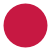
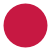
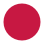
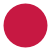
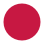
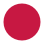
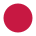

In [8]:
soup

In [9]:
link=[]
for li in soup.findAll('h3', class_='findcare-search-list-item__heading'):
    for i in li.findAll('a'):
        link.append(i['href'])

In [10]:
links=[]
for l in link[0:10]:
    links.append(l)
for i in link[11:]:
    links.append('https://www.1177.se/'+ i)
links    

['https://www.1177.se/hitta-vard/kontaktkort/035-Hemtjanst-AB-Halmstad/',
 'https://www.1177.se/hitta-vard/kontaktkort/040-Sjukgymnastik-Johanneslust-Malmo/',
 'https://www.1177.se/hitta-vard/kontaktkort/1177-Vardguiden-sjukvardsradgivning-i-Jonkopings-lan/',
 'https://www.1177.se/hitta-vard/kontaktkort/2-Tandlakare-Tatiana-Dmitriyev-Tumba/',
 'https://www.1177.se/hitta-vard/kontaktkort/2xTandlakarna-Frimannsson-Vastra-Frolunda/',
 'https://www.1177.se/hitta-vard/kontaktkort/7-7-praktiken-Ganters-Tandvard-Falun/',
 'https://www.1177.se/hitta-vard/kontaktkort/A-M-Psykologresurs-Lund/',
 'https://www.1177.se/hitta-vard/kontaktkort/A-och-A-hemtjanst-i-Halland-AB-HALMSTAD/',
 'https://www.1177.se/hitta-vard/kontaktkort/A-Rosendahl-Tandlakare-AB-Vasteras/',
 'https://www.1177.se/hitta-vard/kontaktkort/A5-Psykoterapi-Katia-Karlsson-Carli-AB-Lund/',
 'https://www.1177.se//hitta-vard/kontaktkort/A6-Ogonklinik-AB/',
 'https://www.1177.se//hitta-vard/kontaktkort/AB-Evelina-Linder-KBT/',
 'https:

In [12]:
links

['https://www.1177.se/hitta-vard/kontaktkort/035-Hemtjanst-AB-Halmstad/',
 'https://www.1177.se/hitta-vard/kontaktkort/040-Sjukgymnastik-Johanneslust-Malmo/',
 'https://www.1177.se/hitta-vard/kontaktkort/1177-Vardguiden-sjukvardsradgivning-i-Jonkopings-lan/',
 'https://www.1177.se/hitta-vard/kontaktkort/2-Tandlakare-Tatiana-Dmitriyev-Tumba/',
 'https://www.1177.se/hitta-vard/kontaktkort/2xTandlakarna-Frimannsson-Vastra-Frolunda/',
 'https://www.1177.se/hitta-vard/kontaktkort/7-7-praktiken-Ganters-Tandvard-Falun/',
 'https://www.1177.se/hitta-vard/kontaktkort/A-M-Psykologresurs-Lund/',
 'https://www.1177.se/hitta-vard/kontaktkort/A-och-A-hemtjanst-i-Halland-AB-HALMSTAD/',
 'https://www.1177.se/hitta-vard/kontaktkort/A-Rosendahl-Tandlakare-AB-Vasteras/',
 'https://www.1177.se/hitta-vard/kontaktkort/A5-Psykoterapi-Katia-Karlsson-Carli-AB-Lund/',
 'https://www.1177.se//hitta-vard/kontaktkort/A6-Ogonklinik-AB/',
 'https://www.1177.se//hitta-vard/kontaktkort/AB-Evelina-Linder-KBT/',
 'https:

In [13]:
html2=requests.get('https://www.1177.se/hitta-vard/kontaktkort/035-Hemtjanst-AB-Halmstad/')
soup2=BS(html2.text, 'lxml')

In [14]:
def name(soup):
    if soup.find('h1', class_='contact-header__heading'):
        return soup.find('h1', class_='contact-header__heading').text
    else:
        return None

In [15]:
name(soup2)

'035 Hemtjänst AB, Halmstad'

In [16]:
def adress(soup):
    if soup.find('p', class_='contact-header__address'):
        return soup.find('p', class_='contact-header__address').text
    else:
        return None

In [17]:
adress(soup2)

'Skepparegatan 3A'

In [18]:
def telefon(soup):
    if soup.find('div', class_='main-info__container--small').find('span'):
        return soup.find('div', class_='main-info__container--small').find('span').text
    else:
        return None

In [19]:
telefon(soup2)

'035-10 07 10'

In [20]:
def area(soup):
    if soup.find('dl', class_='find-us__address'):
        return soup.find(string='Län, kommun:').findNext('dd').get_text()
    else:
        return None

In [21]:
area(soup2)

'Hallands län, Halmstad'

In [67]:
def postadress(soup):
    if soup.find('dl', class_='find-us__address'):
        if soup.find('dl', class_='find-us__address').find('dt',string='Postadress:'):
            return soup.find(string='Postadress:').findNext('dd').get_text()
    else:
        return None

In [68]:
postadress(soup2)

'Skepparegatan 3A, 302 48 Halmstad'

In [24]:
def site(soup):
    if soup.find('a', class_='find-us__webpage'):
        return soup.find('a', class_='find-us__webpage')['href']
    else:
        None

In [25]:
site(soup2)

'http://www.035hemtjanst.se'

In [69]:
Name=[]
Adress=[]
Telefon=[]
Area=[]
Postadress=[]
Site_link=[]

In [70]:
for i in links[0:30]:
    html=requests.get(i)
    soup=BS(html.text, 'lxml')
    Name.append(name(soup))
    Adress.append(adress(soup))
    Telefon.append(telefon(soup))
    Area.append(area(soup))
    Postadress.append(postadress(soup))
    Site_link.append(site(soup))

In [72]:
len(Name)

30

In [74]:
Adress

['Skepparegatan 3A',
 'Johanneslustgatan 12, Malmö',
 None,
 'Tumba Torg 101, 3 tr',
 'Distansgatan 2',
 'Åsgatan 41, Falun',
 'Annedalsvägen 9A',
 'Eurostop',
 'Stora gatan 41',
 'Stortorget 1, Lund',
 'Batterigatan 9 NB, Jönköping',
 'Drottninggatan 1A, Uppsala',
 'Trädgårdsgatan 5A, Uppsala',
 'Östermalmstorg 1, STOCKHOLM',
 'Svetsarvägen 15, 2 tr, SOLNA',
 'Drottninggatan 71A, STOCKHOLM',
 'Drottninggatan 71 A, 3 tr',
 'Tranebergsplan 3, BROMMA',
 'Tranebergsplan 3, BROMMA',
 None,
 'Åstorpsringen 6, BVC Knoppen, Dalens Sjukhus, ENSKEDEDALEN',
 'S:t Eriksgatan 10, STOCKHOLM',
 'Claesgatan 7, Malmö',
 'Postgången 53 53, 17145, SOLNA',
 'Sjukhusgatan, Jönköping, huvudbyggnaden.',
 'Diagnosvägen 15, 416 50, Göteborg, Plan 0, Östra sjukhuset',
 'Lasarettsvägen 1, 801 88 Gävle',
 'Kungsgatan 33, 824 43 Hudiksvall',
 'Sjukhusbacken 10, Södermalm, Stockholm',
 'Västra Esplanaden 9 B, plan 2.']

In [75]:
Telefon

['035-10 07 10',
 '073-395 50 50',
 '1177',
 '08-530 209 00',
 '031-49 51 23',
 '023-212 90',
 '073-364 07 64',
 '035-17 59 00',
 '021-41 96 40',
 '073-046 26 68',
 '036-860 20 30',
 '073-593 00 73',
 '070-818 17 11',
 '08-425 004 00',
 '010-207 11 77',
 '08-21 52 62',
 '08-21 52 62',
 '08-124 440 10',
 '08-124 440 10',
 '073-984 38 15',
 '070-844 02 14',
 '070-377 74 51',
 '040-623 95 11',
 '08-522 797 40',
 '010-242 14 33',
 '031-343 42 15',
 '026-15 41 46',
 '0650-923 25',
 '08-616 27 00',
 '0470-58 32 39']

In [76]:
Area

['Hallands län, Halmstad',
 'Skåne län, Malmö',
 None,
 'Stockholms län, Botkyrka',
 'Västra Götalands län, Göteborg',
 'Dalarnas län, Falun',
 'Skåne län, Lund',
 'Hallands län, Halmstad',
 'Västmanlands län, Västerås',
 'Skåne län, Lund',
 'Jönköpings län, Jönköping',
 'Uppsala län, Uppsala',
 'Uppsala län, Uppsala',
 'Stockholms län, Stockholm',
 'Stockholms län, Solna',
 'Stockholms län, Stockholm',
 'Stockholms län, Stockholm',
 'Stockholms län, Stockholm',
 'Stockholms län, Stockholm',
 None,
 'Stockholms län, Stockholm',
 'Stockholms län, Stockholm',
 'Skåne län, Malmö',
 'Stockholms län, Solna',
 'Jönköpings län, Jönköping',
 'Västra Götalands län, Göteborg',
 'Gävleborgs län, Gävle',
 'Gävleborgs län, Hudiksvall',
 'Stockholms län, Stockholm',
 'Kronobergs län, Växjö']

In [77]:
Postadress

['Skepparegatan 3A, 302 48 Halmstad',
 '040-Sjukgymnastik Johanneslust, Johanneslustgatan 12, 212 28 Malmö',
 None,
 'Tumba Torg 101 3 tr, 147 30 TUMBA',
 'Distansgatan 2, 421 74 Västra Frölunda',
 None,
 'Annedalsvägen 9A, 227 64 Lund',
 None,
 'Stora gatan 41, 722 12  Västerås',
 'Stortorget 1, 222 23 Lund',
 'Batterigatan 9 NB, 553 05 Jönköping',
 'Rättviksvägen 12, 192 71 Sollentuna',
 'Trädgårdsgatan 5A, 753 09 Uppsala',
 'Östermalmstorg 1, 114 42 STOCKHOLM',
 'Svetsarvägen 15, 2 tr, 171 41 SOLNA',
 'Drottninggatan 71A, 111 36 STOCKHOLM',
 'Drottninggatan 71 A, 3 tr., 111 36 STOCKHOLM',
 'Tranebergsplan 3, 167 44 BROMMA',
 'Tranebergsplan 3, 167 44 BROMMA',
 None,
 'Box 12023, ABC Logopedtjänst, 102 21 STOCKHOLM',
 None,
 'Abels Rehab, Claesgatan 7, plan 1, 214 26 Malmö',
 'Postgången 53, 171 45 SOLNA',
 'Abortinformationen, Kvinnokliniken, Länssjukhuset Ryhov, 551 85 Jönköping',
 'Sahlgrenska Universitetssjukhu, Abortmottagning Gynekologi Öst, Diagnosvägen 15, 416 85, Göteborg',


In [79]:
Site_link

['http://www.035hemtjanst.se',
 'http://www.sjukgymnast.eu/',
 None,
 None,
 'http://www.2xf.se',
 None,
 'http://www.psykologresurs.com/',
 'https://www.aahemtjanst.se',
 None,
 'http://www.a5psykoterapi.se',
 'http://www.a6ogonklinik.se',
 'http://www.evelinalinder.com',
 'http://www.kbt-terapeut.se',
 'http://www.lyhord.se',
 'http://kontakt@suavis.se',
 None,
 'http://www.munhalsan.se',
 'http://www.abaogonklinik.se',
 'http://www.abaogonklinik.se',
 None,
 'http://www.abclogopedtjanst.se',
 'http://www.abclogopedtjanst.se',
 'https://www.1177.se/Hitta-vard/Kontakt/?hsaid=SE162321000255-O18968',
 'https://capio.se/specialist/stockholm/gynekologi',
 None,
 'http://www.sahlgrenska.se/abortmottagning',
 None,
 None,
 'http://www.sodersjukhuset.se/abortmottagningen',
 None]

In [80]:
df=pd.DataFrame({'Name':Name,'Flower_Specie':Telefon,'Adress':Adress,'Area':Area,'Postadress':Postadress,'Site_link':Site_link,})

In [81]:
df.to_excel('scraping_1177.se.xlsx')